### The Mathematical Sommelier

In [27]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

### No Whining, Only Dining

"You'll use k-Nearest Neighbors (k-NN) with PCA to create an accurate classification model that can identify wine varieties from their measurable attributes, optimizing the classification through systematic hyperparameter tuning."

In [3]:
wine_df = pd.read_csv('wine_data.csv')

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Field Explanations

Gemini provides an explanation of what these fields mean:

* alcohol: This refers to the ethanol content of the wine, usually expressed as a percentage by volume. It's a major component influencing the wine's body, mouthfeel, and aroma.

* malic_acid: This is one of the primary organic acids found in grapes. It contributes to the wine's tartness. During winemaking, malic acid can be converted to the softer lactic acid in a process called malolactic fermentation.

* ash: This represents the total mineral content of the wine, remaining as a residue after the water and organic compounds are burned off. It includes various inorganic salts and minerals present in the grapes and soil.

* alcalinity_of_ash: This measures the buffering capacity of the wine, specifically its resistance to changes in pH. It's related to the concentration of alkaline compounds (like carbonates and bicarbonates) present in the ash. A higher alkalinity of ash means the wine is more resistant to becoming too acidic.

* magnesium: This is one of the mineral elements found in grapes and wine. It plays a role in various biochemical processes during grape growth and fermentation.

* total_phenols: Phenolic compounds are a diverse group of natural substances found in grapes, particularly in the skins and seeds. They contribute to the wine's color, tannins (which provide structure and mouthfeel), and antioxidant properties. Total phenols represent the overall concentration of these compounds.

* flavanoids: This is a subgroup of phenolic compounds, including anthocyanins (responsible for red wine color) and flavanols (like catechins and tannins). They contribute to color, bitterness, astringency, and antioxidant effects.

* nonflavanoid_phenols: As the name suggests, these are phenolic compounds that are not classified as flavonoids. Examples include hydroxybenzoic acids and hydroxycinnamic acids, which can also influence the wine's aroma, taste, and stability.

* proanthocyanins: These are condensed tannins, which are polymers of flavanols. They significantly contribute to the wine's structure, astringency (the drying sensation in the mouth), and aging potential.

* color_intensity: This is a measure of the wine's color saturation or depth. It's often determined spectrophotometrically. Higher values indicate a more intensely colored wine.

* hue: This describes the shade or tint of the wine's color. It's often expressed as a ratio of absorbance at different wavelengths. For red wines, hue can indicate age, with younger wines having more purple hues and older wines tending towards brick red or tawny. For white wines, it can range from greenish-yellow to golden.

* od280/od315_of_diluted_wines: This is a ratio of the optical density (absorbance) of the wine at 280 nm and 315 nm after dilution. It's often used as an indicator of the concentration of phenolic compounds (measured at 280 nm) relative to other UV-absorbing compounds (measured at 315 nm). A higher ratio can suggest a higher concentration of certain phenols.

* proline: This is an amino acid found in high concentrations in grapes and wine. While it doesn't directly contribute significantly to the taste or aroma, its concentration can be influenced by factors like grape variety, vineyard practices, and vintage.

In [4]:
visual_descriptors = ["color_intensity", "hue"]

taste_and_mouthfeel_components = [
    "alcohol",
    "malic_acid",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins"
]

indirect_taste_and_other_properties = [
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "proline",
    "od280/od315_of_diluted_wines"
]

wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


##### Describe Analysis

All features are numeric. There are no missing or negative values, or any obvious outliers (i.e. max or min values 10x greater than average).

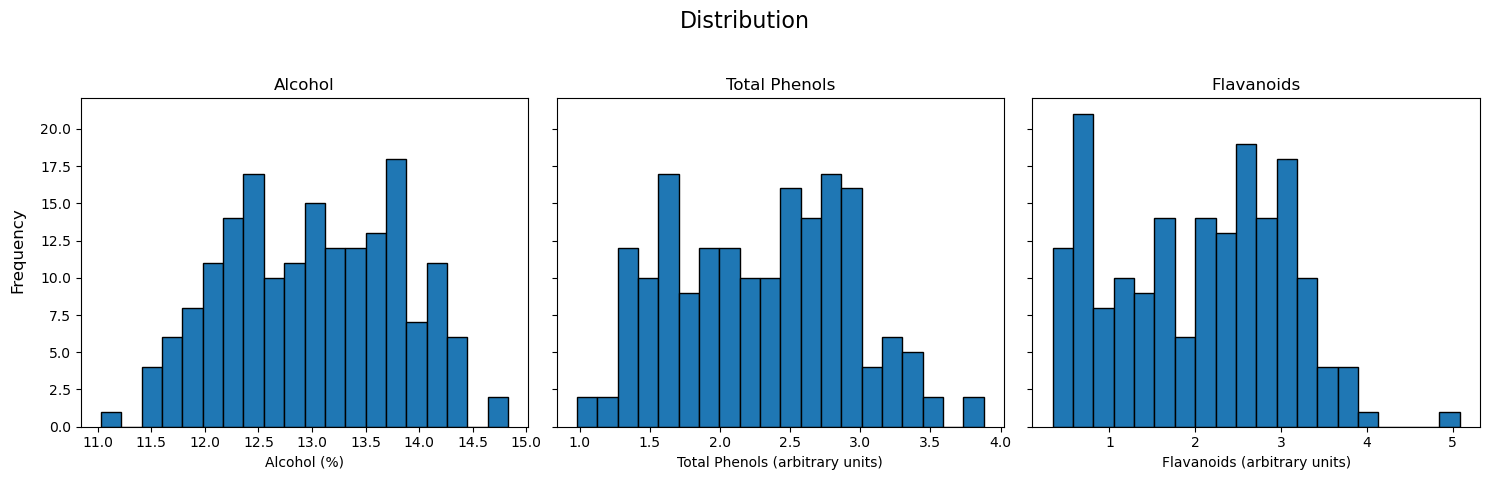

In [28]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution', fontsize=16)
fig.supylabel('Frequency', fontsize=12, x=0.01)

# Histogram for Alcohol
axes[0].hist(wine_df['alcohol'], bins=20, edgecolor='black')
axes[0].set_title('Alcohol')
axes[0].set_xlabel('Alcohol (%)')

# Histogram for Total Phenols
axes[1].hist(wine_df['total_phenols'], bins=20, edgecolor='black')
axes[1].set_title('Total Phenols')
axes[1].set_xlabel('Total Phenols (arbitrary units)')

# Histogram for Flavanoids
axes[2].hist(wine_df['flavanoids'], bins=20, edgecolor='black')
axes[2].set_title('Flavanoids')
axes[2].set_xlabel('Flavanoids (arbitrary units)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle and supylabel
plt.show()

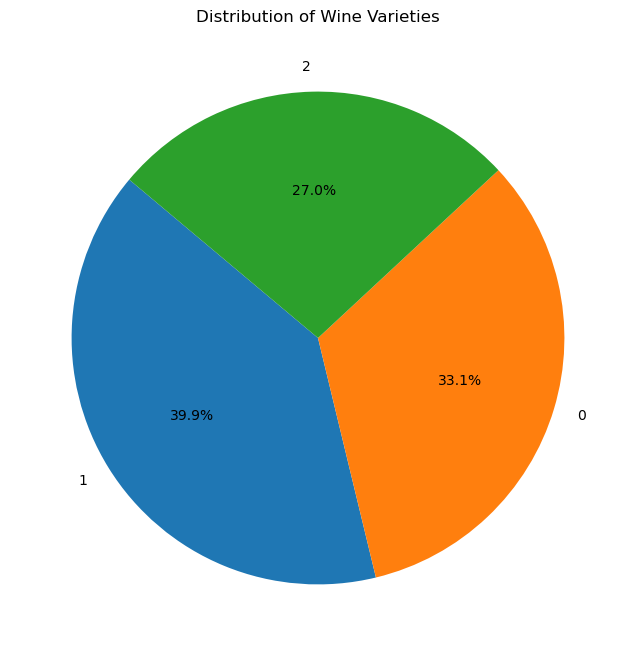

In [6]:
target_counts = wine_df['target'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts,
        labels=target_counts.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribution of Wine Varieties')
plt.show()

# White/red/rosé?

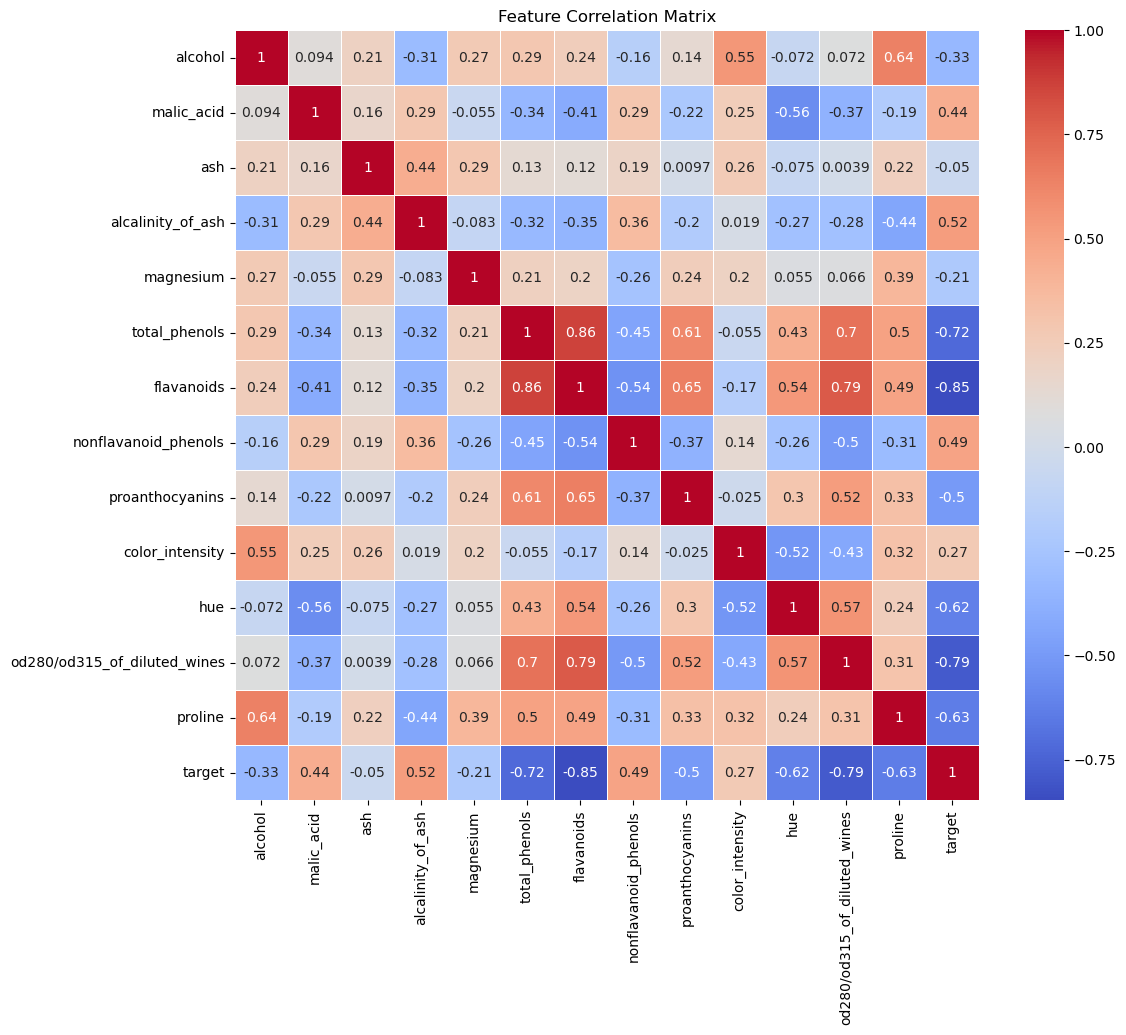

In [7]:
correlation_matrix = wine_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

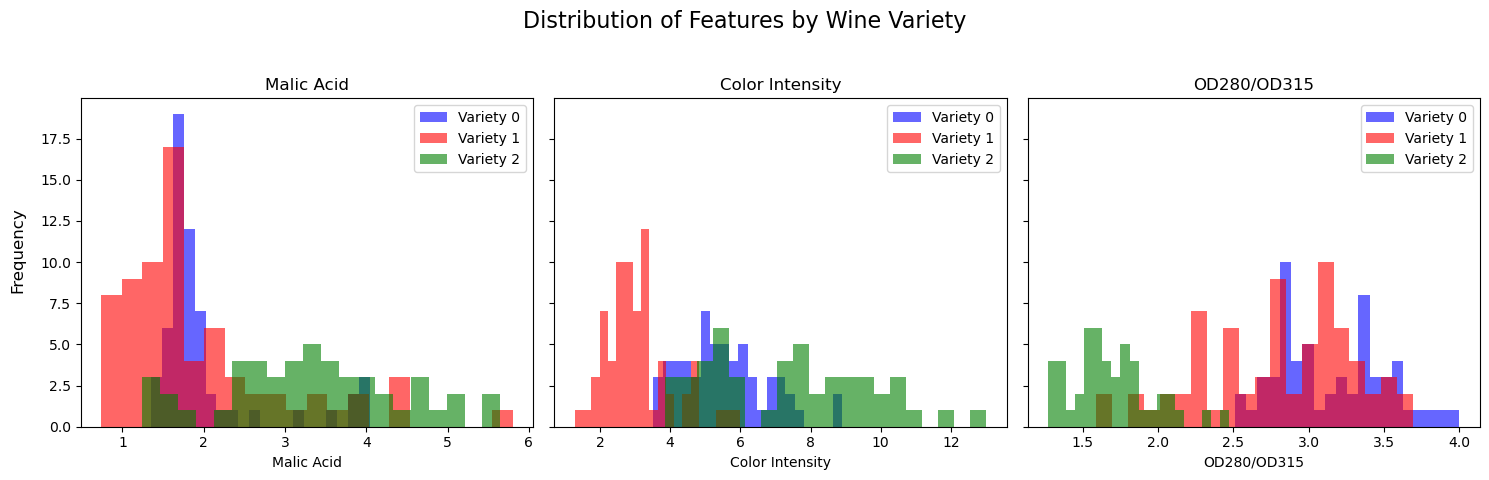

In [8]:
# Define colors for the target categories
colors = {0: 'blue', 1: 'red', 2: 'green'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of Features by Wine Variety', fontsize=16)
fig.supylabel('Frequency', fontsize=12, x=0.01)

# Histogram for Malic Acid
for variety, color in colors.items():
    axes[0].hist(wine_df[wine_df['target'] == variety]['malic_acid'],
                 bins=20,
                 color=color,
                 alpha=0.6,
                 label=f'Variety {variety}')
axes[0].set_title('Malic Acid')
axes[0].set_xlabel('Malic Acid')
axes[0].legend()

# Histogram for Color Intensity
for variety, color in colors.items():
    axes[1].hist(wine_df[wine_df['target'] == variety]['color_intensity'],
                 bins=20,
                 color=color,
                 alpha=0.6,
                 label=f'Variety {variety}')
axes[1].set_title('Color Intensity')
axes[1].set_xlabel('Color Intensity')
axes[1].legend()

# Histogram for OD280/OD315
for variety, color in colors.items():
    axes[2].hist(wine_df[wine_df['target'] == variety]['od280/od315_of_diluted_wines'],
                 bins=20,
                 color=color,
                 alpha=0.6,
                 label=f'Variety {variety}')
axes[2].set_title('OD280/OD315')
axes[2].set_xlabel('OD280/OD315')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### EDA Analysis

Correlation matrix - the od280 field, flavanoids, and total phenols have the strongest correlation with the target, which is evenly distributed between the three categories. We can see above that OD280 is relatively distinct for the "green" group (variety 2). Varieties 0 and 1 seem to be the most similar. If these represent white/red/rosé then likely rosé and white are 0 and 1 (unclear which is which). 

### KNN Modeling

In [9]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Splitting the data into training and testing sets (75-25 split and random_state of 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
# Map to track scores for different approaches
scores_map = {}
scores_map['basic_knn'] = cv_scores.mean()

cv_scores.mean()

0.9478632478632478

#### Hyperparameter Tuning

In [10]:
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create base model with best metric
base_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Initialize and run grid search
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_


In [11]:
print(best_params)
scores_map['tuned_knn_best'] = best_cv_accuracy
best_cv_accuracy

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


0.9700854700854702

In [12]:
knn_best = KNeighborsClassifier(**best_params)
cv_scores = cross_val_score(knn_best, X_train_scaled, y_train, cv=5)
scores_map['tuned_knn_avg'] = cv_scores.mean()
cv_scores.mean()

# Hyperparameter tuning improved accuracy from 94.8% to 95.4%

0.9700854700854702

#### PCA Dimension Reduction

In [13]:
pca = PCA()

pca.fit(X_train_scaled)

X_ts_pca = pca.transform(X_train_scaled)

pca_df = pd.DataFrame(data=X_ts_pca, columns=[f'PC{i+1}' for i in range(X_ts_pca.shape[1])])
pca_df['target'] = y_train


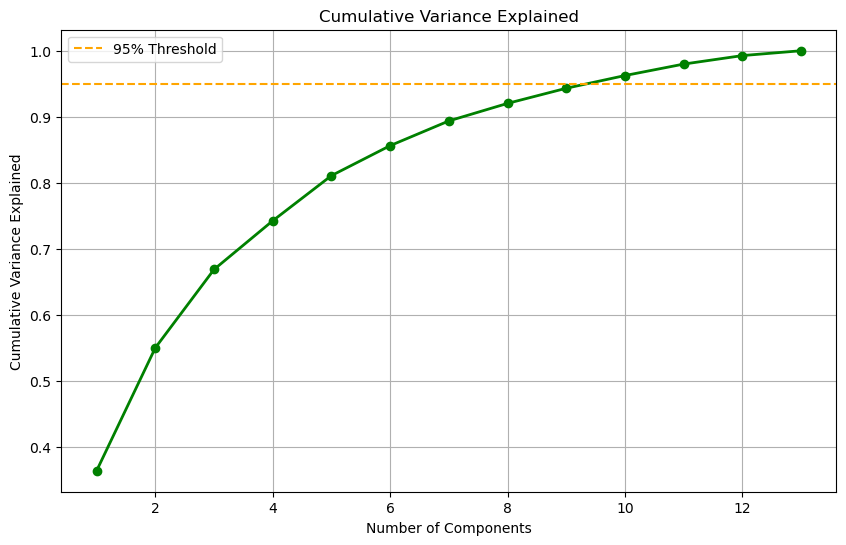

In [14]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-',
          linewidth=2, color='green')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% Threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# We'll need 10 components to retain 95% of variance explained
# This is not a large dimension reduction from 13

target_variance = 0.95
n_components_variance = np.argmax(cumulative_variance_ratio >= target_variance) + 1

n_components_variance

10

In [16]:
pca_optimal = PCA(n_components=n_components_variance)
X_ts_pca_optimal = pca_optimal.fit_transform(X_train_scaled)

#### KNN PCA Tuning

In [17]:
knn_pca = KNeighborsClassifier(**best_params) # From grid search on NON-PCA transformed data
cv_scores = cross_val_score(knn_pca, X_ts_pca_optimal, y_train, cv=5)
scores_map['pca_knn'] = cv_scores.mean()
cv_scores.mean()

0.9319088319088319

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn_pca, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_ts_pca_optimal, y_train)

best_params_pca = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_
scores_map['tuned_knn_pca_best'] = best_cv_accuracy
best_cv_accuracy

0.9549857549857549

In [19]:
best_params_pca

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [20]:
knn_tuned_pca = KNeighborsClassifier(**best_params_pca)
cv_scores = cross_val_score(knn_tuned_pca, X_ts_pca_optimal, y_train, cv=5)
scores_map['tuned_knn_pca_avg'] = cv_scores.mean()
cv_scores.mean()

0.9549857549857549

#### Test Time

In [ ]:
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

X_test_pca_optimal = pca_optimal.transform(X_test_scaled)
knn_tuned_pca.fit(X_ts_pca_optimal, y_train)
y_pred_pca = knn_tuned_pca.predict(X_test_pca_optimal)
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)

test_accuracy, test_accuracy_pca

(0.9555555555555556, 0.9555555555555556)

In [22]:
y_pred == y_pred_pca

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

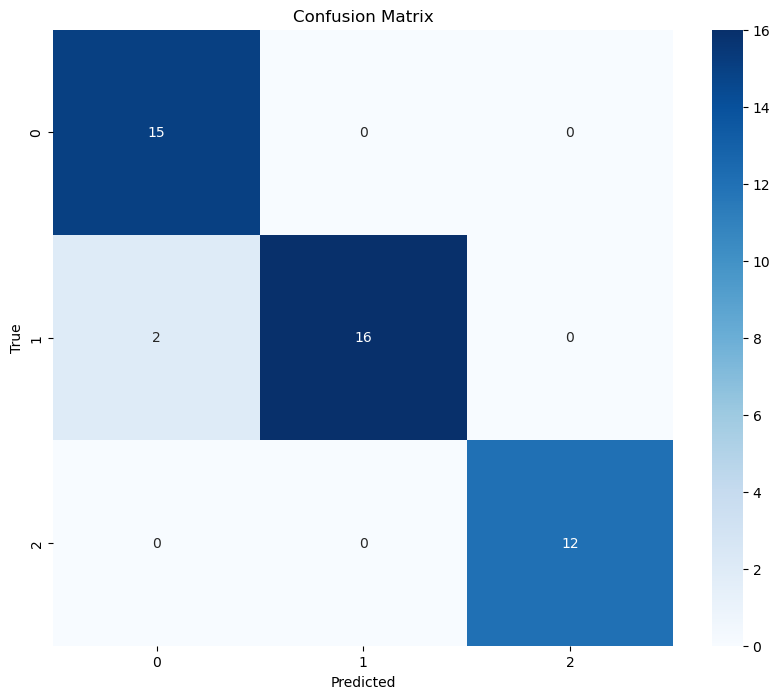

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Note - this CM shows both PCA and non-PCA as their predictions are identical

In [31]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



##### PCA Visualization

The following visualizations are not especially illuminating/useful as to drop down to these lower dimensions we had to sacrifice a substantial amount of the variance.

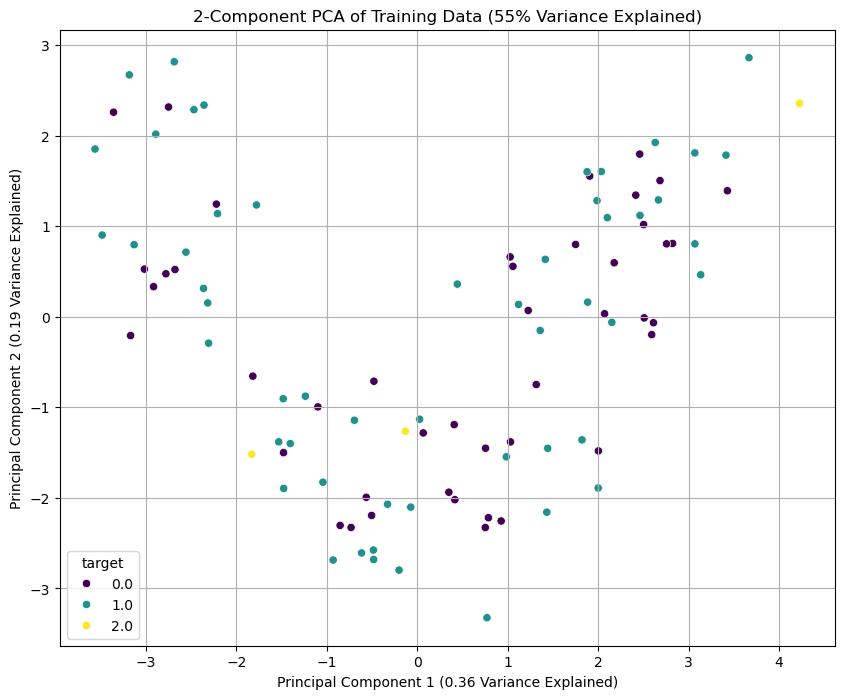

In [24]:
# 2-Component PCA
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

pca_df_2d = pd.DataFrame(data=X_train_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['target'] = y_train

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df_2d, palette='viridis')
plt.title('2-Component PCA of Training Data (55% Variance Explained)')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]:.2f} Variance Explained)')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]:.2f} Variance Explained)')
plt.grid(True)
plt.show()

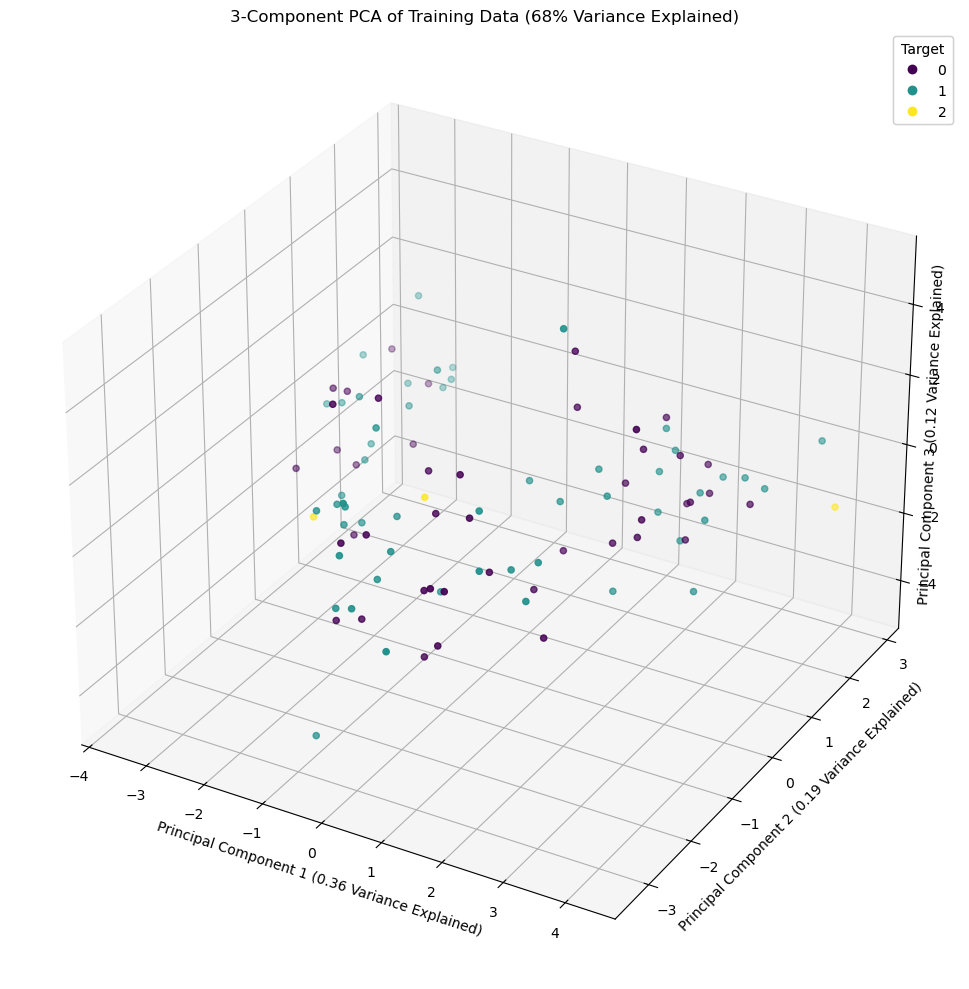

In [25]:
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)

pca_df_3d = pd.DataFrame(data=X_train_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['target'] = y_train

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['target'], cmap='viridis')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Target")
ax.add_artist(legend1)

ax.set_title('3-Component PCA of Training Data (68% Variance Explained)')
ax.set_xlabel(f'Principal Component 1 ({pca_3d.explained_variance_ratio_[0]:.2f} Variance Explained)')
ax.set_ylabel(f'Principal Component 2 ({pca_3d.explained_variance_ratio_[1]:.2f} Variance Explained)')
ax.set_zlabel(f'Principal Component 3 ({pca_3d.explained_variance_ratio_[2]:.2f} Variance Explained)', labelpad=-10)
plt.tight_layout()
plt.show()

In [ ]:
# Note that the "best" scores are not entirely apples to apples comparisons

scores_map

{'basic_knn': 0.9478632478632478,
 'tuned_knn_best': 0.9700854700854702,
 'tuned_knn_avg': 0.9700854700854702,
 'pca_knn': 0.9319088319088319,
 'tuned_knn_pca_best': 0.9549857549857549,
 'tuned_knn_pca_avg': 0.9549857549857549}

#### Final Analysis/Recommendations

All variants of KNN classification perform well on training data, with accuracy generally around 95%.

For PCA, to keep 95% of variance explained (coincidence with accuracy result, not inherently the same value), we chose 10 components, down from 13. This was not a substantial reduction, but there was also no real reduction in predictive power. On the final test, both non-PCA and PCA tuned models resulted in the same predictions and maintained 95% accuracy.

Recommendation - the current data set is very small, so PCA does not offer a substantial performance increase. With a larger data set (many more rows and columns) PCA could provide benefits. 